In [1]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/Users/advaitgadhikar/opt/anaconda3/envs/experiments/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [167]:
data = pd.read_csv('results-noise-ablate.csv')
print(data.keys())

Index(['Name', ' Dim', 'Noise', 'Epochs', 'Optimizer', 'Train Loss',
       'Test Loss', 'Num Samples', 'Weight Init', 'Weight Learnt', 'A init',
       'A learnt'],
      dtype='object')


In [168]:
noise = np.array(data['Noise'])
method = np.array(data['Optimizer'])
test = np.array(data['Test Loss'])
train = np.array(data['Train Loss'])
weight_init = np.array(data['Weight Init'])
weight_learnt = np.array(data['Weight Learnt'])
a_init = np.array(data['A init'])
a_learnt = np.array(data['A learnt'])
# print(method)


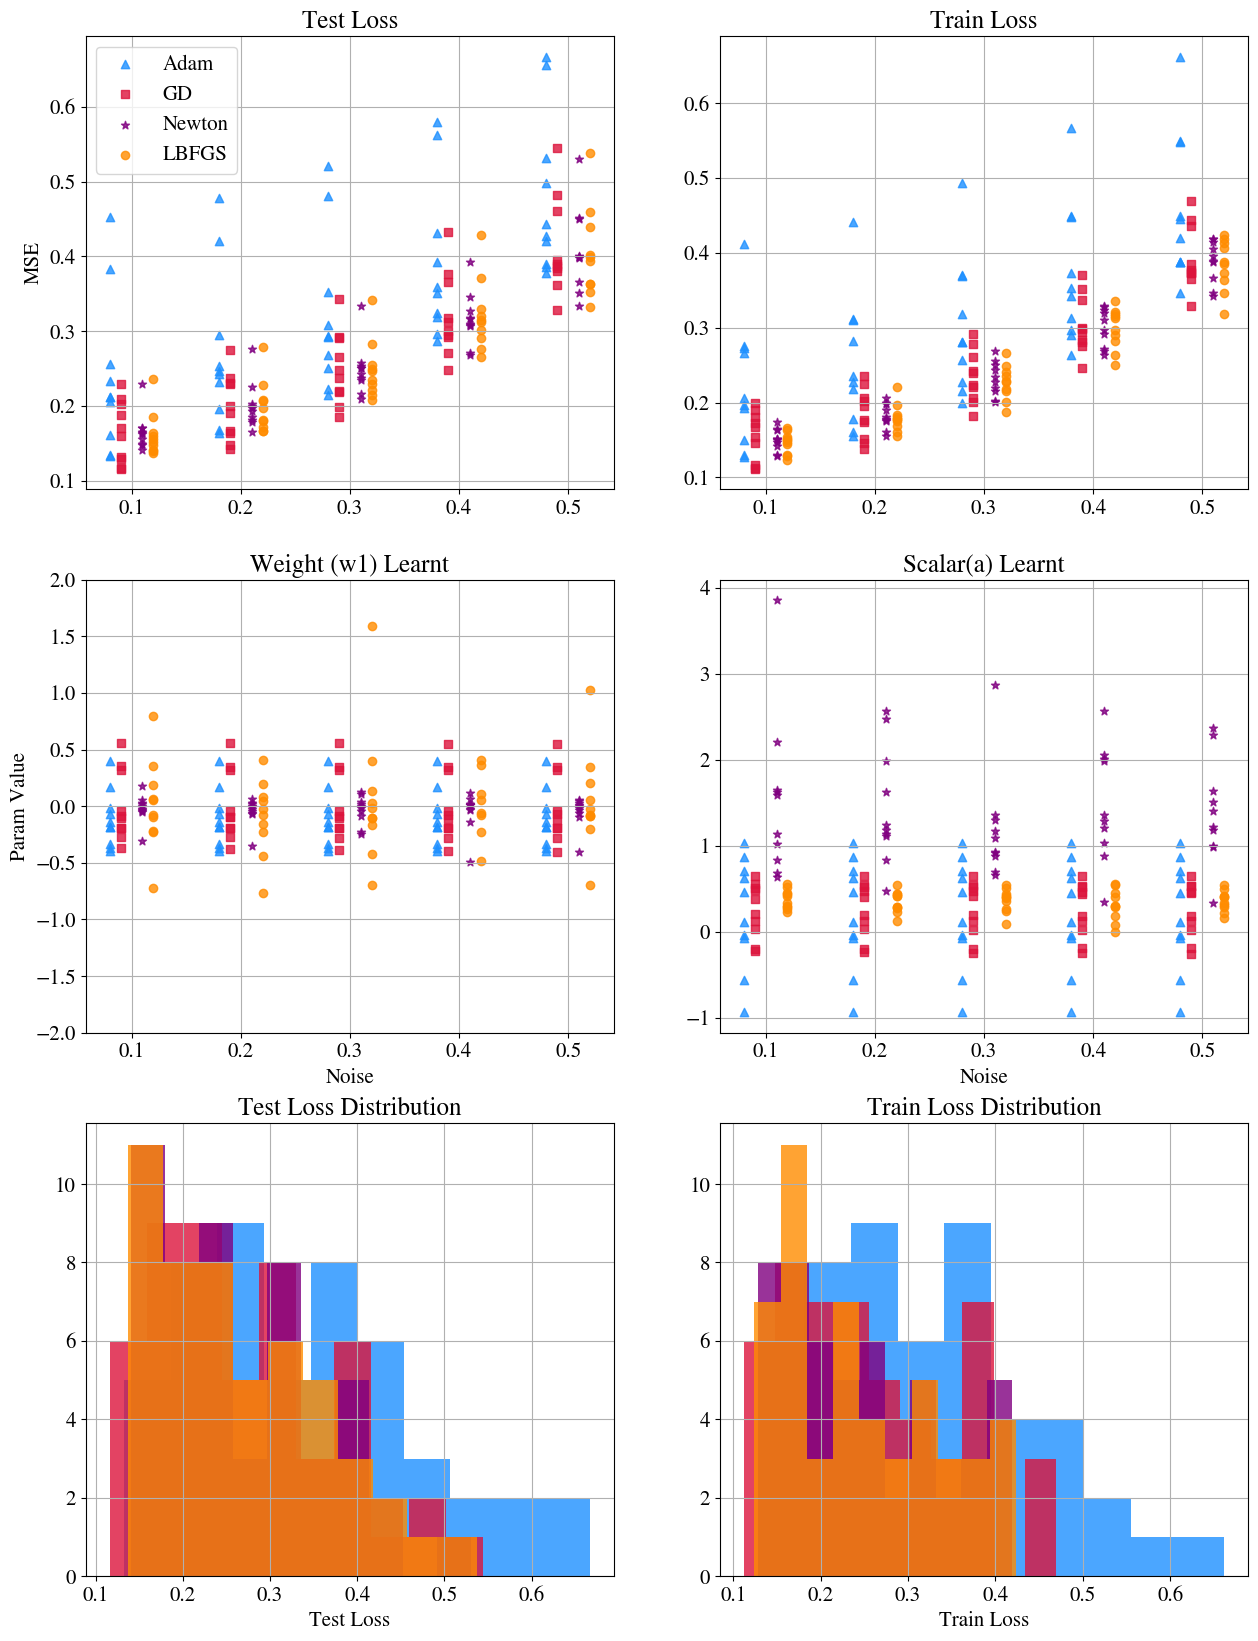

In [169]:
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams.update({'font.size': 15})

fig, ax = plt.subplots(3, 2, figsize=(15, 20))
adam = np.argwhere(method==' adam')
lbfgs = np.argwhere(method==' lbfgs')
sgd = np.argwhere(method==' sgd')
newton = np.argwhere(method==' newton')
# print(adam)
# fig.suptitle('Noise Ablation')

ax[0, 0].scatter(noise[adam]-0.02, test[adam], color='dodgerblue', marker='^', label='Adam', alpha=0.8)
ax[0, 0].scatter(noise[sgd]-0.01, test[sgd], color='crimson', marker='s', label='GD', alpha=0.8)
ax[0, 0].scatter(noise[newton]+0.01, test[newton], color='purple', marker='*', label='Newton', alpha=0.8)
ax[0, 0].scatter(noise[lbfgs]+0.02, test[lbfgs], color='darkorange', marker='o', label='LBFGS', alpha=0.8)
ax[0, 0].grid()
ax[0, 0].legend(loc = 'upper left')
ax[0, 0].set_title('Test Loss')
ax[0, 0].set_ylabel('MSE')

ax[0, 1].scatter(noise[adam]-0.02, train[adam], color='dodgerblue', marker='^', label='Adam', alpha=0.8)
ax[0, 1].scatter(noise[sgd]-0.01, train[sgd], color='crimson', marker='s', label='GD', alpha=0.8)
ax[0, 1].scatter(noise[newton]+0.01, train[newton], color='purple', marker='*', label='Newton', alpha=0.8)
ax[0, 1].scatter(noise[lbfgs]+0.02, train[lbfgs], color='darkorange', marker='o', label='LBFGS', alpha=0.8)
ax[0, 1].grid()
# ax[1].legend()
ax[0, 1].set_title('Train Loss')

ax[1, 0].scatter(noise[adam]-0.02, weight_learnt[adam], color='dodgerblue', marker='^', label='Adam', alpha=0.8)
ax[1, 0].scatter(noise[sgd]-0.01, weight_learnt[sgd], color='crimson', marker='s', label='GD', alpha=0.8)
ax[1, 0].scatter(noise[newton]+0.01, weight_learnt[newton], color='purple', marker='*', label='Newton', alpha=0.8)
ax[1, 0].scatter(noise[lbfgs]+0.02, weight_learnt[lbfgs], color='darkorange', marker='o', label='LBFGS', alpha=0.8)
ax[1, 0].grid()
ax[1, 0].set_title('Weight (w1) Learnt')
ax[1, 0].set_ylabel('Param Value')
ax[1, 0].set_ylim(-2,2)

ax[1, 0].set_xlabel('Noise')

ax[1, 1].scatter(noise[adam]-0.02, a_learnt[adam], color='dodgerblue', marker='^', label='Adam', alpha=0.8)
ax[1, 1].scatter(noise[sgd]-0.01, a_learnt[sgd], color='crimson', marker='s', label='GD', alpha=0.8)
ax[1, 1].scatter(noise[newton]+0.01, a_learnt[newton], color='purple', marker='*', label='Newton', alpha=0.8)
ax[1, 1].scatter(noise[lbfgs]+0.02, a_learnt[lbfgs], color='darkorange', marker='o', label='LBFGS', alpha=0.8)
ax[1, 1].grid()
ax[1, 1].set_title('Scalar(a) Learnt')
ax[1, 1].set_xlabel('Noise')

ax[2, 0].hist(test[adam], color='dodgerblue', label='Adam', alpha=0.8)
ax[2, 0].hist(test[sgd], color='crimson', label='GD', alpha=0.8)
ax[2, 0].hist(test[newton], color='purple', label='Newton', alpha=0.8)
ax[2, 0].hist(test[lbfgs], color='darkorange', label='LBFGS', alpha=0.8)
ax[2, 0].grid()
# ax[2, 0].legend(loc = 'upper left')
ax[2, 0].set_title('Test Loss Distribution')
ax[2, 0].set_xlabel('Test Loss')

ax[2, 1].hist(train[adam], color='dodgerblue', label='Adam', alpha=0.8)
ax[2, 1].hist(train[sgd], color='crimson', label='GD', alpha=0.8)
ax[2, 1].hist(train[newton], color='purple', label='Newton', alpha=0.8)
ax[2, 1].hist(train[lbfgs], color='darkorange', label='LBFGS', alpha=0.8)
ax[2, 1].grid()
ax[2, 1].set_title('Train Loss Distribution')
ax[2, 1].set_xlabel('Train Loss')

plt.savefig('noise_ablation.pdf', bbox_inches='tight')

In [170]:
data = pd.read_csv('results-epochs-ablate.csv')
print(data.keys())
noise = np.array(data['Noise'])
method = np.array(data['Optimizer'])
test = np.array(data['Test Loss'])
train = np.array(data['Train Loss'])
weight_init = np.array(data['Weight Init'])
weight_learnt = np.array(data['Weight Learnt'])
a_init = np.array(data['A init'])
a_learnt = np.array(data['A learnt'])
epochs = np.array(data['Epochs'])

Index(['Name', ' Dim', 'Noise', 'Epochs', 'Optimizer', 'Train Loss',
       'Test Loss', 'Num Samples', 'Weight Init', 'Weight Learnt', 'A init',
       'A learnt'],
      dtype='object')


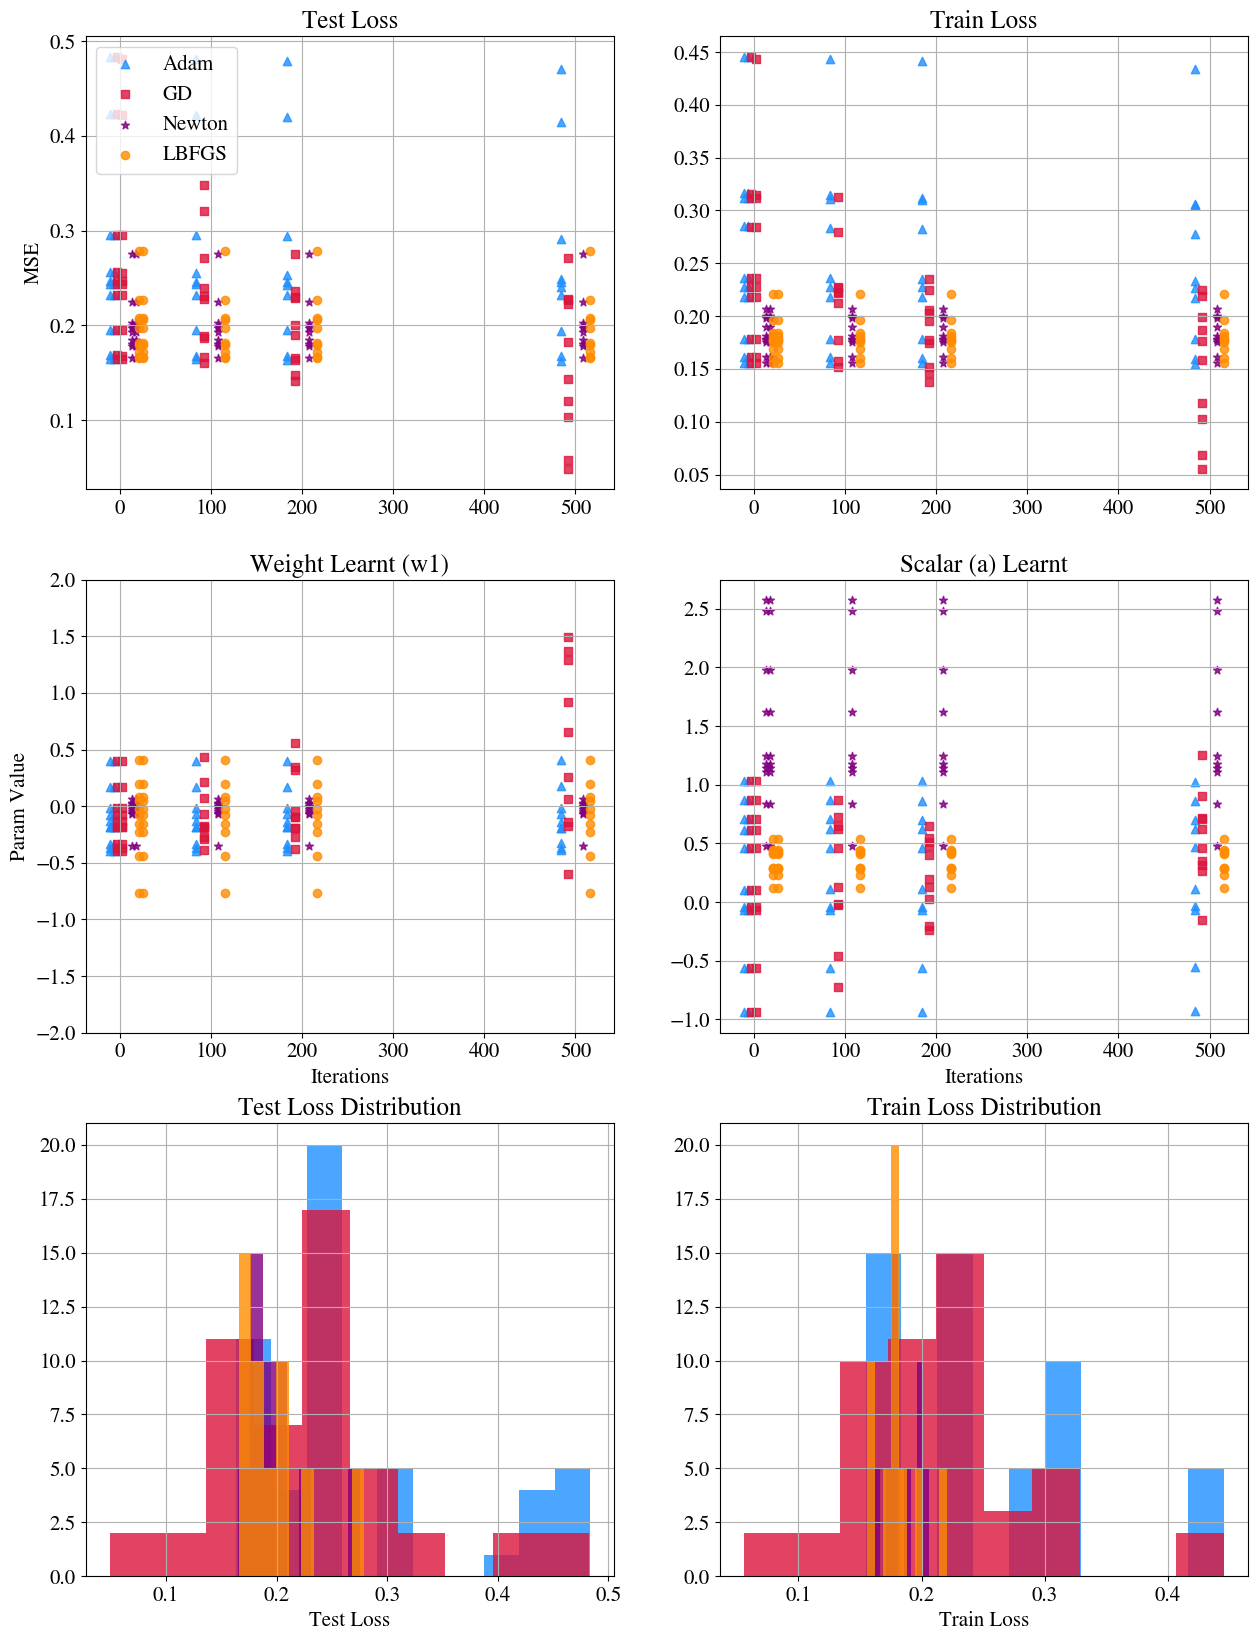

In [171]:
fig, ax = plt.subplots(3, 2, figsize=(15, 20))
adam = np.argwhere(method==' adam')
lbfgs = np.argwhere(method==' lbfgs')
sgd = np.argwhere(method==' sgd')
newton = np.argwhere(method==' newton')
# print(adam)
# fig.suptitle('Iterations Ablations')

ax[0, 0].scatter(epochs[adam]-16, test[adam], color='dodgerblue', marker='^', label='Adam', alpha=0.8)
ax[0, 0].scatter(epochs[sgd]-8, test[sgd], color='crimson', marker='s', label='GD', alpha=0.8)
ax[0, 0].scatter(epochs[newton]+8, test[newton], color='purple', marker='*', label='Newton', alpha=0.8)
ax[0, 0].scatter(epochs[lbfgs]+16, test[lbfgs], color='darkorange', marker='o', label='LBFGS', alpha=0.8)
ax[0, 0].grid()
ax[0, 0].legend(loc = 'upper left')
ax[0, 0].set_title('Test Loss')
ax[0, 0].set_ylabel('MSE')

ax[0, 1].scatter(epochs[adam]-16, train[adam], color='dodgerblue', marker='^', label='Adam', alpha=0.8)
ax[0, 1].scatter(epochs[sgd]-8, train[sgd], color='crimson', marker='s', label='GD', alpha=0.8)
ax[0, 1].scatter(epochs[newton]+8, train[newton], color='purple', marker='*', label='Newton', alpha=0.8)
ax[0, 1].scatter(epochs[lbfgs]+16, train[lbfgs], color='darkorange', marker='o', label='LBFGS', alpha=0.8)
ax[0, 1].grid()
# ax[1].legend()
ax[0, 1].set_title('Train Loss')

ax[1, 0].scatter(epochs[adam]-16, weight_learnt[adam], color='dodgerblue', marker='^', label='Adam', alpha=0.8)
ax[1, 0].scatter(epochs[sgd]-8, weight_learnt[sgd], color='crimson', marker='s', label='GD', alpha=0.8)
ax[1, 0].scatter(epochs[newton]+8, weight_learnt[newton], color='purple', marker='*', label='Newton', alpha=0.8)
ax[1, 0].scatter(epochs[lbfgs]+16, weight_learnt[lbfgs], color='darkorange', marker='o', label='LBFGS', alpha=0.8)
ax[1, 0].grid()
ax[1, 0].set_title('Weight Learnt (w1)')
ax[1, 0].set_ylabel('Param Value')
ax[1, 0].set_ylim(-2,2)

ax[1, 0].set_xlabel('Iterations')

ax[1, 1].scatter(epochs[adam]-16, a_learnt[adam], color='dodgerblue', marker='^', label='Adam', alpha=0.8)
ax[1, 1].scatter(epochs[sgd]-8, a_learnt[sgd], color='crimson', marker='s', label='GD', alpha=0.8)
ax[1, 1].scatter(epochs[newton]+8, a_learnt[newton], color='purple', marker='*', label='Newton', alpha=0.8)
ax[1, 1].scatter(epochs[lbfgs]+16, a_learnt[lbfgs], color='darkorange', marker='o', label='LBFGS', alpha=0.8)
ax[1, 1].grid()
ax[1, 1].set_title('Scalar (a) Learnt')
ax[1, 1].set_xlabel('Iterations')

ax[2, 0].hist(test[adam], color='dodgerblue', label='Adam', alpha=0.8)
ax[2, 0].hist(test[sgd], color='crimson', label='GD', alpha=0.8)
ax[2, 0].hist(test[newton], color='purple', label='Newton', alpha=0.8)
ax[2, 0].hist(test[lbfgs], color='darkorange', label='LBFGS', alpha=0.8)
ax[2, 0].grid()
# ax[2, 0].legend(loc = 'upper left')
ax[2, 0].set_title('Test Loss Distribution')
ax[2, 0].set_xlabel('Test Loss')

ax[2, 1].hist(train[adam], color='dodgerblue', label='Adam', alpha=0.8)
ax[2, 1].hist(train[sgd], color='crimson', label='GD', alpha=0.8)
ax[2, 1].hist(train[newton], color='purple', label='Newton', alpha=0.8)
ax[2, 1].hist(train[lbfgs], color='darkorange', label='LBFGS', alpha=0.8)
ax[2, 1].grid()
ax[2, 1].set_title('Train Loss Distribution')
ax[2, 1].set_xlabel('Train Loss')

plt.savefig('epochs_ablation.pdf', bbox_inches='tight')

Index(['Name', ' Dim', 'Noise', 'Epochs', 'Optimizer', 'Train Loss',
       'Test Loss', 'Num Samples', 'Weight Init', 'Weight Learnt', 'A init',
       'A learnt'],
      dtype='object')


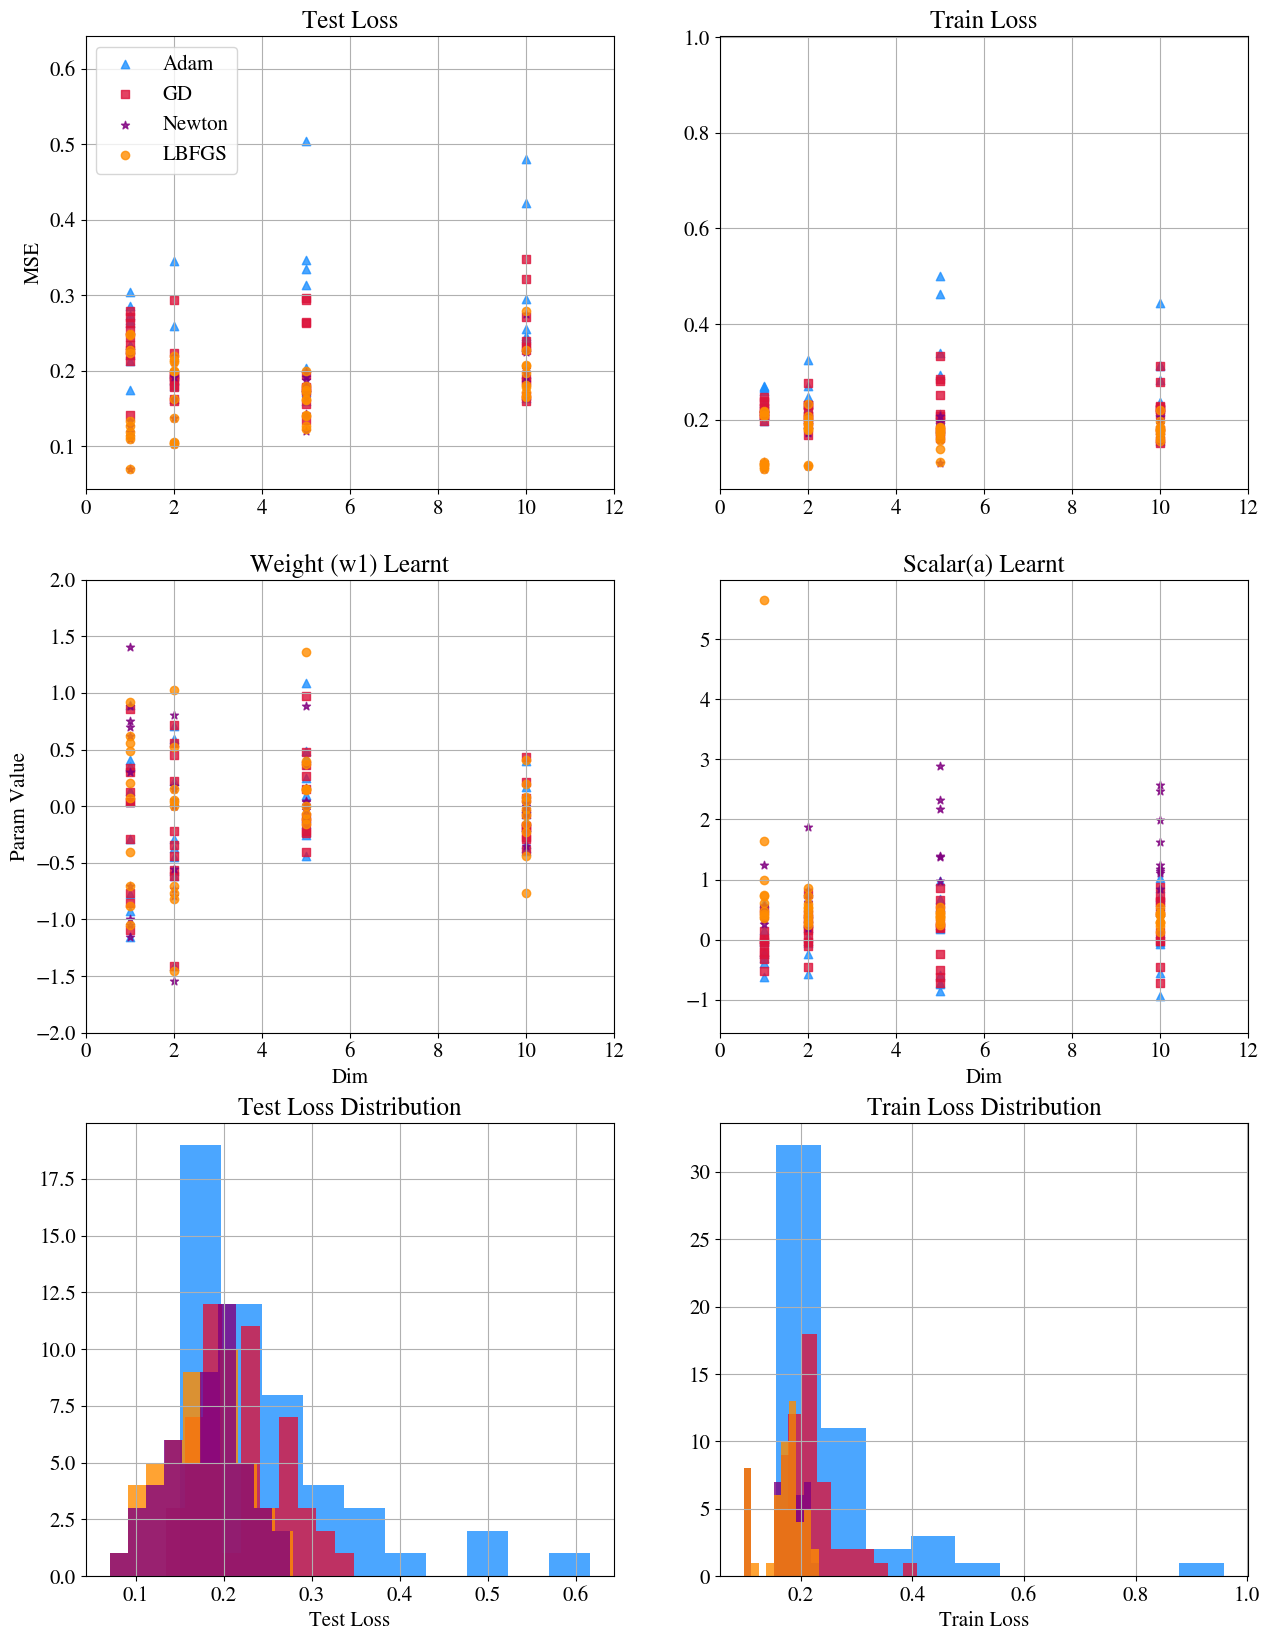

In [172]:
data = pd.read_csv('results-dim-ablate.csv')
print(data.keys())
dim = np.array(data[' Dim'])
method = np.array(data['Optimizer'])
test = np.array(data['Test Loss'])
train = np.array(data['Train Loss'])
weight_init = np.array(data['Weight Init'])
weight_learnt = np.array(data['Weight Learnt'])
a_init = np.array(data['A init'])
a_learnt = np.array(data['A learnt'])
epochs = np.array(data['Epochs'])

fig, ax = plt.subplots(3, 2, figsize=(15, 20))
adam = np.argwhere(method==' adam')
lbfgs = np.argwhere(method==' lbfgs')
sgd = np.argwhere(method==' sgd')
newton = np.argwhere(method==' newton')
# print(adam)
# fig.suptitle('Dimension Ablations')

ax[0, 0].scatter(dim[adam], test[adam], color='dodgerblue', marker='^', label='Adam', alpha=0.8)
ax[0, 0].scatter(dim[sgd], test[sgd], color='crimson', marker='s', label='GD', alpha=0.8)
ax[0, 0].scatter(dim[newton], test[newton], color='purple', marker='*', label='Newton', alpha=0.8)
ax[0, 0].scatter(dim[lbfgs], test[lbfgs], color='darkorange', marker='o', label='LBFGS', alpha=0.8)
ax[0, 0].grid()
ax[0, 0].legend(loc = 'upper left')
ax[0, 0].set_title('Test Loss')
ax[0, 0].set_ylabel('MSE')
ax[0, 0].set_xlim(0,12)

ax[0, 1].scatter(dim[adam], train[adam], color='dodgerblue', marker='^', label='Adam', alpha=0.8)
ax[0, 1].scatter(dim[sgd], train[sgd], color='crimson', marker='s', label='GD', alpha=0.8)
ax[0, 1].scatter(dim[newton], train[newton], color='purple', marker='*', label='Newton', alpha=0.8)
ax[0, 1].scatter(dim[lbfgs], train[lbfgs], color='darkorange', marker='o', label='LBFGS', alpha=0.8)
ax[0, 1].grid()
ax[0, 1].set_xlim(0,12)

# ax[1].legend()
ax[0, 1].set_title('Train Loss')

ax[1, 0].scatter(dim[adam], weight_learnt[adam], color='dodgerblue', marker='^', label='Adam', alpha=0.8)
ax[1, 0].scatter(dim[sgd], weight_learnt[sgd], color='crimson', marker='s', label='GD', alpha=0.8)
ax[1, 0].scatter(dim[newton], weight_learnt[newton], color='purple', marker='*', label='Newton', alpha=0.8)
ax[1, 0].scatter(dim[lbfgs], weight_learnt[lbfgs], color='darkorange', marker='o', label='LBFGS', alpha=0.8)
ax[1, 0].grid()
ax[1, 0].set_title('Weight (w1) Learnt')
ax[1, 0].set_ylabel('Param Value')
ax[1, 0].set_ylim(-2,2)
ax[1, 0].set_xlim(0,12)

ax[1, 0].set_xlabel('Dim')

ax[1, 1].scatter(dim[adam], a_learnt[adam], color='dodgerblue', marker='^', label='Adam', alpha=0.8)
ax[1, 1].scatter(dim[sgd], a_learnt[sgd], color='crimson', marker='s', label='GD', alpha=0.8)
ax[1, 1].scatter(dim[newton], a_learnt[newton], color='purple', marker='*', label='Newton', alpha=0.8)
ax[1, 1].scatter(dim[lbfgs], a_learnt[lbfgs], color='darkorange', marker='o', label='LBFGS', alpha=0.8)
ax[1, 1].grid()
ax[1, 1].set_title('Scalar(a) Learnt')
ax[1, 1].set_xlabel('Dim')
ax[1, 1].set_xlim(0,12)

ax[2, 0].hist(test[adam], color='dodgerblue', label='Adam', alpha=0.8)
ax[2, 0].hist(test[sgd], color='crimson', label='GD', alpha=0.8)
ax[2, 0].hist(test[lbfgs], color='darkorange', label='LBFGS', alpha=0.8)
ax[2, 0].hist(test[newton], color='purple', label='Newton', alpha=0.8)
ax[2, 0].grid()
# ax[2, 0].legend(loc = 'upper left')
ax[2, 0].set_title('Test Loss Distribution')
ax[2, 0].set_xlabel('Test Loss')

ax[2, 1].hist(train[adam], color='dodgerblue', label='Adam', alpha=0.8)
ax[2, 1].hist(train[sgd], color='crimson', label='GD', alpha=0.8)
ax[2, 1].hist(train[newton], color='purple', label='Newton', alpha=0.8)
ax[2, 1].hist(train[lbfgs], color='darkorange', label='LBFGS', alpha=0.8)
ax[2, 1].grid()
ax[2, 1].set_title('Train Loss Distribution')
ax[2, 1].set_xlabel('Train Loss')

plt.savefig('dim_ablation.pdf', bbox_inches='tight')

In [164]:
train_adam = []
test_adam = []
train_lbfgs = []
test_lbfgs = []
train_sgd = []
test_sgd = []
train_newton = []
test_newton = []

for i in range(10):
    for method in ['adam', 'lbfgs', 'sgd', 'newton']:
        train = torch.load('train_loss_'+str(method)+'_200_0.2_10_'+str(i)+'.pt')
        test = torch.load('test_loss_'+str(method)+'_200_0.2_10_'+str(i)+'.pt')
        # print(test)
        if method == 'adam':
            train_adam.append(np.array([t.detach().item() for t in train]))
            test_adam.append(np.array([t.detach().item() for t in test]))    
        if method == 'lbfgs':
            train_lbfgs.append(np.array([t.detach().item() for t in train]))
            test_lbfgs.append(np.array([t.detach().item() for t in test]))    
        if method == 'newton':
            train_newton.append(np.array([t.detach().item() for t in train]))
            test_newton.append(np.array([t.detach().item() for t in test]))    
        if method == 'sgd':
            train_sgd.append(np.array([t.detach().item() for t in train]))
            test_sgd.append(np.array([t.detach().item() for t in test]))    
        
print(len(train_list))
train_adam = np.stack(train_adam, axis=1)
test_adam = np.stack(test_adam, axis=1)
train_lbfgs = np.stack(train_lbfgs, axis=1)
test_lbfgs = np.stack(test_lbfgs, axis=1)
train_sgd = np.stack(train_sgd, axis=1)
test_sgd = np.stack(test_sgd, axis=1)
train_newton = np.stack(train_newton, axis=1)
test_newton = np.stack(test_newton, axis=1)

train_mean_adam = train_adam.mean(axis=1)
train_mean_lbfgs = train_lbfgs.mean(axis=1)
train_mean_newton = train_newton.mean(axis=1)
train_mean_sgd = train_sgd.mean(axis=1)

test_mean_adam = test_adam.mean(axis=1)
test_mean_lbfgs = test_lbfgs.mean(axis=1)
test_mean_newton = test_newton.mean(axis=1)
test_mean_sgd = test_sgd.mean(axis=1)

train_std_adam = train_adam.std(axis=1)
train_std_lbfgs = train_lbfgs.std(axis=1)
train_std_newton = train_newton.std(axis=1)
train_std_sgd = train_sgd.std(axis=1)

test_std_adam = test_adam.std(axis=1)
test_std_lbfgs = test_lbfgs.std(axis=1)
test_std_newton = test_newton.std(axis=1)
test_std_sgd = test_sgd.std(axis=1)

print(train_list.shape)

400
(400, 40)


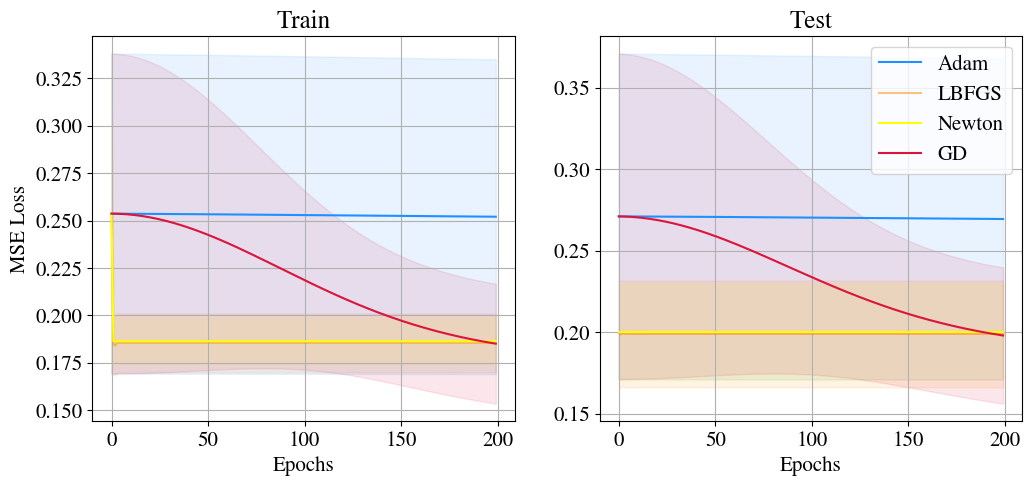

In [165]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(np.arange(len(train_mean_adam)), train_mean_adam, color='dodgerblue', label='Adam')
ax[0].fill_between(np.arange(len(train_mean_adam)), train_mean_adam - train_std_adam, train_mean_adam + train_std_adam, color='dodgerblue', alpha=0.1)
ax[0].plot(np.arange(len(train_mean_lbfgs)), train_mean_lbfgs, color='darkorange', label='LBFGS', alpha=0.5)
ax[0].fill_between(np.arange(len(train_mean_lbfgs)), train_mean_lbfgs - train_std_lbfgs, train_mean_lbfgs + train_std_lbfgs, color='darkorange', alpha=0.1)
ax[0].plot(np.arange(len(train_mean_newton)), train_mean_newton, color='yellow', label='Newton')
ax[0].fill_between(np.arange(len(train_mean_newton)), train_mean_newton - train_std_newton, train_mean_newton + train_std_newton, color='yellow', alpha=0.1)

ax[0].plot(np.arange(len(train_mean_sgd)), train_mean_sgd, color='crimson', label='SGD')
ax[0].fill_between(np.arange(len(train_mean_sgd)), train_mean_sgd - train_std_sgd, train_mean_sgd + train_std_sgd, color='crimson', alpha=0.1)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('MSE Loss')
ax[0].set_title('Train')

# ax[0].set_xlim(0,400)
ax[0].grid()
ax[1].plot(np.arange(len(test_mean_adam)), test_mean_adam, color='dodgerblue', label='Adam')
ax[1].fill_between(np.arange(len(test_mean_adam)), test_mean_adam - test_std_adam, test_mean_adam + test_std_adam, color='dodgerblue', alpha=0.1)
ax[1].plot(np.arange(len(test_mean_lbfgs)), test_mean_lbfgs, color='darkorange', label='LBFGS', alpha=0.5)
ax[1].fill_between(np.arange(len(test_mean_lbfgs)), test_mean_lbfgs - test_std_lbfgs, test_mean_lbfgs + test_std_lbfgs, color='darkorange', alpha=0.1)
ax[1].plot(np.arange(len(test_mean_newton)), test_mean_newton, color='yellow', label='Newton')
ax[1].fill_between(np.arange(len(test_mean_newton)), test_mean_newton - test_std_newton, test_mean_newton + test_std_newton, color='yellow', alpha=0.1)
ax[1].plot(np.arange(len(test_mean_sgd)), test_mean_sgd, color='crimson', label='GD')
ax[1].fill_between(np.arange(len(test_mean_sgd)), test_mean_sgd - test_std_sgd, test_mean_sgd + test_std_sgd, color='crimson', alpha=0.1)

ax[1].legend(loc='upper right')
ax[1].grid()
ax[1].set_xlabel('Epochs')
ax[1].set_title('Test')

plt.savefig('loss_gaussian_noise.pdf', bbox_inches='tight')


In [161]:
data = pd.read_csv('results-plot.csv')
print(data.keys())
dim = np.array(data[' Dim'])
method = np.array(data['Optimizer'])
test = np.array(data['Test Loss'])
train = np.array(data['Train Loss'])
weight_init = np.array(data['Weight Init'])
weight_learnt = np.array(data['Weight Learnt'])
a_init = np.array(data['A init'])
a_learnt = np.array(data['A learnt'])
epochs = np.array(data['Epochs'])


Index(['Name', ' Dim', 'Noise', 'Epochs', 'Optimizer', 'Train Loss',
       'Test Loss', 'Num Samples', 'Weight Init', 'Weight Learnt', 'A init',
       'A learnt'],
      dtype='object')


Text(0, 0.5, 'Scalar (a)')

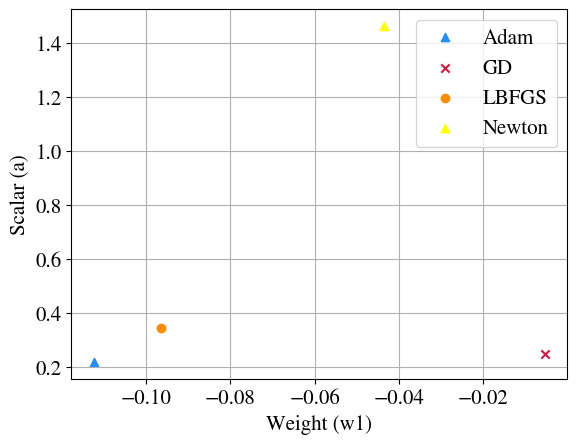

In [162]:
adam = np.argwhere(method==' adam')
lbfgs = np.argwhere(method==' lbfgs')
sgd = np.argwhere(method==' sgd')
newton = np.argwhere(method==' newton')

mean_weight_adam = weight_learnt[adam].mean()
mean_weight_sgd = weight_learnt[sgd].mean()
mean_weight_lbfgs = weight_learnt[lbfgs].mean()
mean_weight_newton = weight_learnt[newton].mean()

mean_a_adam = a_learnt[adam].mean()
mean_a_sgd = a_learnt[sgd].mean()
mean_a_lbfgs = a_learnt[lbfgs].mean()
mean_a_newton = a_learnt[newton].mean()

plt.figure()
plt.scatter(mean_weight_adam, mean_a_adam, label='Adam', color='dodgerblue', marker='^')
plt.scatter(mean_weight_sgd, mean_a_sgd, label='GD', color='crimson', marker='x')
plt.scatter(mean_weight_lbfgs, mean_a_lbfgs, label='LBFGS', color='darkorange', marker='o')
plt.scatter(mean_weight_newton, mean_a_newton, label='Newton', color='yellow', marker='^')
plt.grid()
plt.legend()
plt.xlabel('Weight (w1)')
plt.ylabel('Scalar (a)')

### Results for Correlated Noise

400
(400, 40)


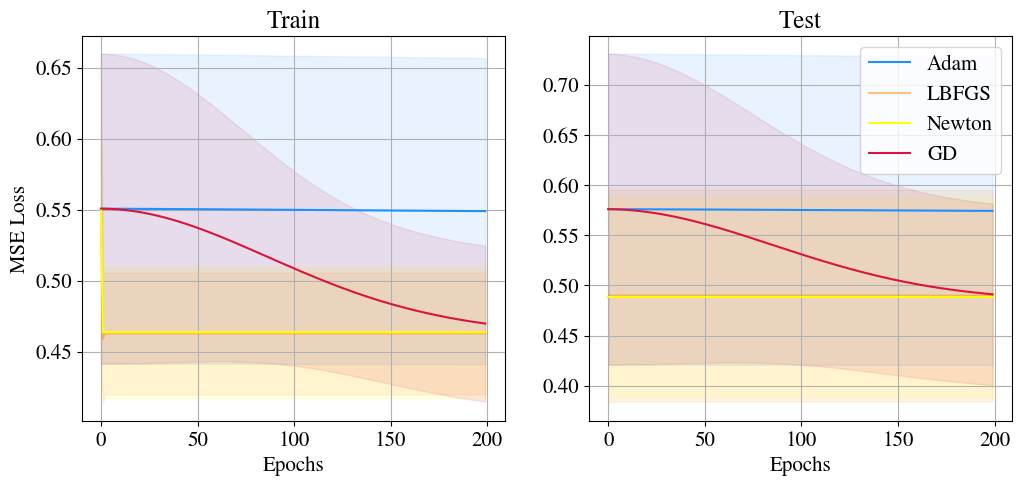

In [166]:
train_adam = []
test_adam = []
train_lbfgs = []
test_lbfgs = []
train_sgd = []
test_sgd = []
train_newton = []
test_newton = []

for i in range(10):
    for method in ['adam', 'lbfgs', 'sgd', 'newton']:
        train = torch.load('train_loss_correlated_noise_'+str(method)+'_200_0.2_10_'+str(i)+'.pt')
        test = torch.load('test_loss_correlated_noise_'+str(method)+'_200_0.2_10_'+str(i)+'.pt')
        # print(test)
        if method == 'adam':
            train_adam.append(np.array([t.detach().item() for t in train]))
            test_adam.append(np.array([t.detach().item() for t in test]))    
        if method == 'lbfgs':
            train_lbfgs.append(np.array([t.detach().item() for t in train]))
            test_lbfgs.append(np.array([t.detach().item() for t in test]))    
        if method == 'newton':
            train_newton.append(np.array([t.detach().item() for t in train]))
            test_newton.append(np.array([t.detach().item() for t in test]))    
        if method == 'sgd':
            train_sgd.append(np.array([t.detach().item() for t in train]))
            test_sgd.append(np.array([t.detach().item() for t in test]))    
        
print(len(train_list))
train_adam = np.stack(train_adam, axis=1)
test_adam = np.stack(test_adam, axis=1)
train_lbfgs = np.stack(train_lbfgs, axis=1)
test_lbfgs = np.stack(test_lbfgs, axis=1)
train_sgd = np.stack(train_sgd, axis=1)
test_sgd = np.stack(test_sgd, axis=1)
train_newton = np.stack(train_newton, axis=1)
test_newton = np.stack(test_newton, axis=1)

train_mean_adam = train_adam.mean(axis=1)
train_mean_lbfgs = train_lbfgs.mean(axis=1)
train_mean_newton = train_newton.mean(axis=1)
train_mean_sgd = train_sgd.mean(axis=1)

test_mean_adam = test_adam.mean(axis=1)
test_mean_lbfgs = test_lbfgs.mean(axis=1)
test_mean_newton = test_newton.mean(axis=1)
test_mean_sgd = test_sgd.mean(axis=1)

train_std_adam = train_adam.std(axis=1)
train_std_lbfgs = train_lbfgs.std(axis=1)
train_std_newton = train_newton.std(axis=1)
train_std_sgd = train_sgd.std(axis=1)

test_std_adam = test_adam.std(axis=1)
test_std_lbfgs = test_lbfgs.std(axis=1)
test_std_newton = test_newton.std(axis=1)
test_std_sgd = test_sgd.std(axis=1)

print(train_list.shape)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(np.arange(len(train_mean_adam)), train_mean_adam, color='dodgerblue', label='Adam')
ax[0].fill_between(np.arange(len(train_mean_adam)), train_mean_adam - train_std_adam, train_mean_adam + train_std_adam, color='dodgerblue', alpha=0.1)
ax[0].plot(np.arange(len(train_mean_lbfgs)), train_mean_lbfgs, color='darkorange', label='LBFGS', alpha=0.5)
ax[0].fill_between(np.arange(len(train_mean_lbfgs)), train_mean_lbfgs - train_std_lbfgs, train_mean_lbfgs + train_std_lbfgs, color='darkorange', alpha=0.1)
ax[0].plot(np.arange(len(train_mean_newton)), train_mean_newton, color='yellow', label='Newton')
ax[0].fill_between(np.arange(len(train_mean_newton)), train_mean_newton - train_std_newton, train_mean_newton + train_std_newton, color='yellow', alpha=0.1)

ax[0].plot(np.arange(len(train_mean_sgd)), train_mean_sgd, color='crimson', label='SGD')
ax[0].fill_between(np.arange(len(train_mean_sgd)), train_mean_sgd - train_std_sgd, train_mean_sgd + train_std_sgd, color='crimson', alpha=0.1)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('MSE Loss')
ax[0].set_title('Train')

# ax[0].set_xlim(0,400)
ax[0].grid()
ax[1].plot(np.arange(len(test_mean_adam)), test_mean_adam, color='dodgerblue', label='Adam')
ax[1].fill_between(np.arange(len(test_mean_adam)), test_mean_adam - test_std_adam, test_mean_adam + test_std_adam, color='dodgerblue', alpha=0.1)
ax[1].plot(np.arange(len(test_mean_lbfgs)), test_mean_lbfgs, color='darkorange', label='LBFGS', alpha=0.5)
ax[1].fill_between(np.arange(len(test_mean_lbfgs)), test_mean_lbfgs - test_std_lbfgs, test_mean_lbfgs + test_std_lbfgs, color='darkorange', alpha=0.1)
ax[1].plot(np.arange(len(test_mean_newton)), test_mean_newton, color='yellow', label='Newton')
ax[1].fill_between(np.arange(len(test_mean_newton)), test_mean_newton - test_std_newton, test_mean_newton + test_std_newton, color='yellow', alpha=0.1)
ax[1].plot(np.arange(len(test_mean_sgd)), test_mean_sgd, color='crimson', label='GD')
ax[1].fill_between(np.arange(len(test_mean_sgd)), test_mean_sgd - test_std_sgd, test_mean_sgd + test_std_sgd, color='crimson', alpha=0.1)

ax[1].legend(loc='upper right')
ax[1].grid()
ax[1].set_xlabel('Epochs')
ax[1].set_title('Test')
plt.savefig('loss_correlated_noise.pdf', bbox_inches='tight')
